# 航空公司乘客满意度数据集

训练集：airline_survey_train.csv 

测试集：airline_survey_test.csv 

简介：该数据集包含航空公司乘客满意度调查结果，可以用于分析哪些因素与满意（或不满意）的乘客高度相关，并构建机器学习模型，预测乘客的满意度。

变量含义：
- Gender：乘客的性别（女性、男性）
- Customer Type：客户类型（忠诚客户、非忠诚客户）
- Age：乘客的年龄
- Type of Travel：乘客的飞行目的（个人旅行、商务旅行）
- Class：乘客乘坐飞机的旅行舱（Business - 商务舱、Eco - 经济舱、Eco-Plus - 舒适经济舱）
- Flight distance：这段旅程的飞行距离
- Inflight wifi service：机上无线网络服务的满意度（0：没有；1-5）
- Departure/Arrival time convenient：离港/抵达时间方便的满意度
- Ease of Online booking：在线预订的满意度
- Gate location：登机口位置满意度
- Food and drink：食品和饮料的满意度
- Satisfaction level of online boarding：在线登机的满意度
- Seat comfort：座椅舒适度的满意度
- Inflight entertainment：机上娱乐的满意度
- On-board service：机上服务满意度
- Leg room service：腿部空间满意度
- Baggage handling：行李处理的满意度
- Check-in service：登机服务满意度
- Inflight service：机上服务满意度
- Cleanliness：清洁度满意度
- Departure Delay in Minutes：出发时延迟的分钟数
- Arrival Delay in Minutes：抵达时延迟的分钟数
- Satisfaction：航空公司满意度（满意、中立或不满意）

In [1]:
import numpy as np
import pandas as pd

## 读取数据

In [2]:
orignial_train_data = pd.read_csv('airline_survey_train.csv')

In [3]:
cleaned_train_data = orignial_train_data.copy()

In [4]:
cleaned_train_data.head(20)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


## 清理和评估

这部分对数据的结构和内容进行处理，即整齐度和干净度。

数据的结构性问题包括“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个单元格”这三个标准。数据的内容性包括存在丢失数据，重复数据，无效数据等

从上面来看，数据满足：每个变量为一列，每个观察值为一行，每种类型的观察单位为一个单元格，因此不存在结构性问题

In [5]:
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

我们发现：

- Arrival Delay in Minutes列存在缺失值，后续将对其进行处理。

- 并且Gender，Customer Type，Type of Travel，Class，Inflight wifi service，Departure/Arrival time convenient，Ease of Online booking

Gate location，Food and drink，Satisfaction level of online boarding，Seat comfort，Inflight entertainment，On-board service，Leg room service，

Baggage handling，Check-in service，Cleanliness，Satisfaction都属于分类变量，应该转化成分类类型

- id应该转化成字符串类型

- Departure Delay in Minutes应该统一为浮点数类型

In [6]:
cleaned_train_data['id'] = cleaned_train_data['id'].astype('str')
cleaned_train_data['Departure Delay in Minutes'] = cleaned_train_data['Departure Delay in Minutes'].astype('float64')
cleaned_train_data['Gender'] = cleaned_train_data['Gender'].astype('category')
cleaned_train_data['Customer Type'] = cleaned_train_data['Customer Type'].astype('category')
cleaned_train_data['Type of Travel'] = cleaned_train_data['Type of Travel'].astype('category')
cleaned_train_data['Class'] = cleaned_train_data['Class'].astype('category')
cleaned_train_data['satisfaction'] = cleaned_train_data['satisfaction'].astype('category')

In [7]:
satisfaction_columns = cleaned_train_data.iloc[:,8:22]
satisfaction_columns

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [8]:
cleaned_train_data.iloc[:,8:22] = cleaned_train_data.iloc[:,8:22].astype('category')
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103904 non-null  int64   
 1   id                                 103904 non-null  object  
 2   Gender                             103904 non-null  category
 3   Customer Type                      103904 non-null  category
 4   Age                                103904 non-null  int64   
 5   Type of Travel                     103904 non-null  category
 6   Class                              103904 non-null  category
 7   Flight Distance                    103904 non-null  int64   
 8   Inflight wifi service              103904 non-null  category
 9   Departure/Arrival time convenient  103904 non-null  category
 10  Ease of Online booking             103904 non-null  category
 11  Gate location             

### 处理缺失值

Arrival Delay in Minutes存在缺失值

In [9]:
cleaned_train_data[cleaned_train_data['Arrival Delay in Minutes'].isna()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31.0,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38.0,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11.0,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41.0,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1.0,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,...,3,4,5,4,3,4,3,230.0,NaN,neutral or dissatisfied
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,...,3,3,1,2,4,2,3,55.0,NaN,neutral or dissatisfied
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,...,5,4,1,5,5,3,5,0.0,NaN,neutral or dissatisfied
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,...,5,1,5,5,5,3,5,0.0,NaN,satisfied


有310条观察值的抵达后延迟分钟数存在缺失。我们认为抵达后延迟分钟数可能会对顾客满意度有影响，先进行保留。

但由于后面需要用到的逻辑回归函数Logit不允许有缺失值，所以我们暂用平均值为代替

In [10]:
average_min = cleaned_train_data['Arrival Delay in Minutes'].mean()
cleaned_train_data['Arrival Delay in Minutes'] = cleaned_train_data['Arrival Delay in Minutes'].fillna(average_min)
cleaned_train_data['Arrival Delay in Minutes'].isna().sum()

0

### 处理重复值

id为顾客的唯一标识，不应该存在重复值。因此查看是否有重复值

In [11]:
cleaned_train_data['id'].duplicated().sum()

0

输出为0，不存在重复值

### 处理不一致数据

所有关于满意度的分类变量都应该只有0-5的数字，一项项查看是否存在不在该区间的数字

In [12]:
cleaned_train_data.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

数量正确

In [13]:
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103904 non-null  int64   
 1   id                                 103904 non-null  object  
 2   Gender                             103904 non-null  category
 3   Customer Type                      103904 non-null  category
 4   Age                                103904 non-null  int64   
 5   Type of Travel                     103904 non-null  category
 6   Class                              103904 non-null  category
 7   Flight Distance                    103904 non-null  int64   
 8   Inflight wifi service              103904 non-null  category
 9   Departure/Arrival time convenient  103904 non-null  category
 10  Ease of Online booking             103904 non-null  category
 11  Gate location             

乘客的性别（女性、男性）

In [14]:
cleaned_train_data['Gender'].value_counts()

Gender
Female    52727
Male      51177
Name: count, dtype: int64

客户类型（忠诚客户、非忠诚客户）

In [15]:
cleaned_train_data['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

乘客的飞行目的（个人旅行、商务旅行）

In [16]:
cleaned_train_data['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

乘客乘坐飞机的旅行舱（Business - 商务舱、Eco - 经济舱、Eco-Plus - 舒适经济舱）

In [17]:
cleaned_train_data['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [18]:
satisfaction_columns = satisfaction_columns.astype('category')
satisfaction_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Inflight wifi service              103904 non-null  category
 1   Departure/Arrival time convenient  103904 non-null  category
 2   Ease of Online booking             103904 non-null  category
 3   Gate location                      103904 non-null  category
 4   Food and drink                     103904 non-null  category
 5   Online boarding                    103904 non-null  category
 6   Seat comfort                       103904 non-null  category
 7   Inflight entertainment             103904 non-null  category
 8   On-board service                   103904 non-null  category
 9   Leg room service                   103904 non-null  category
 10  Baggage handling                   103904 non-null  category
 11  Checkin service           

In [19]:
satisfaction_columns_type = satisfaction_columns.select_dtypes(include=['category'])
satisfaction_columns_counts = satisfaction_columns_type.apply(lambda x:pd.Series(x).value_counts())
satisfaction_columns_counts

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3103,5300,4487,1,107,2428,1,14,3,472,NaN,1,3,12
1,17840,15498,17525,17562,12837,10692,12075,12478,11872,10353,7237.0,12890,7084,13318
2,25830,17191,24021,19459,21988,17505,14897,17637,14681,19525,11521.0,12893,11457,16132
3,25868,17966,24449,28577,22300,21804,18696,19139,22833,20098,20632.0,28446,20299,24574
4,19794,25546,19571,24426,24359,30762,31765,29423,30867,28789,37383.0,29055,37945,27179
5,11469,22403,13851,13879,22313,20713,26470,25213,23648,24667,27131.0,20619,27116,22689


上面我们可以发现满意度分类变量只有0-5的数字，不存在不在0-5区间的数字

航空公司满意度（满意、中立或不满意）

In [20]:
cleaned_train_data['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

综上，不存在不一致数据

### 处理无效或错误数据

In [21]:
cleaned_train_data.describe()

,Unnamed: 0,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,39.379706,1189.448375,14.815618,15.178678
std,29994.645522,15.114964,997.147281,38.230901,38.640909
min,0.000000,7.000000,31.000000,0.000000,0.000000
25%,25975.750000,27.000000,414.000000,0.000000,0.000000
50%,51951.500000,40.000000,843.000000,0.000000,0.000000
75%,77927.250000,51.000000,1743.000000,12.000000,13.000000
max,103903.000000,85.000000,4983.000000,1592.000000,1584.000000


数据不存在脱离现实的数值

## 探索数据

先设定色盘

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('pastel')

### 顾客种类与满意度的关系

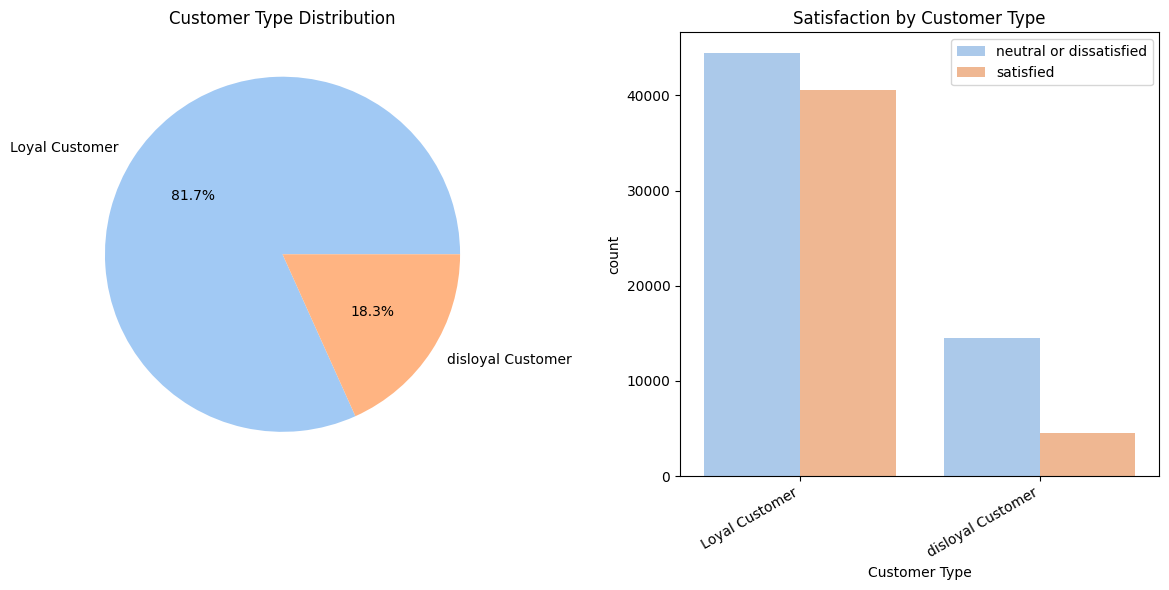

In [23]:
figure, axes = plt.subplots(1, 2,figsize = (12,6))

# 绘制第一个图（饼图）
customer_type_counts = cleaned_train_data['Customer Type'].value_counts()
customer_type_label = customer_type_counts.index
axes[0].pie(customer_type_counts, labels=customer_type_label, autopct='%.1f%%')
axes[0].set_title('Customer Type Distribution')

# 绘制第二个图（直方图）
sns.countplot(cleaned_train_data, x='Customer Type', hue='satisfaction', ax=axes[1])
axes[1].set_title('Satisfaction by Customer Type')
axes[1].legend(bbox_to_anchor = (1,1))
axes[1].set_xticks(range(len(customer_type_label)))
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=30,horizontalalignment = 'right')

plt.tight_layout()
plt.show()


上面可以发现，忠实顾客比非忠实顾客的数量多，且忠实顾客中满意的顾客略少于中立或不满意的。非忠实顾客感到不满意的顾客比满意的多了一半不止

### 飞行目的与满意度的关系

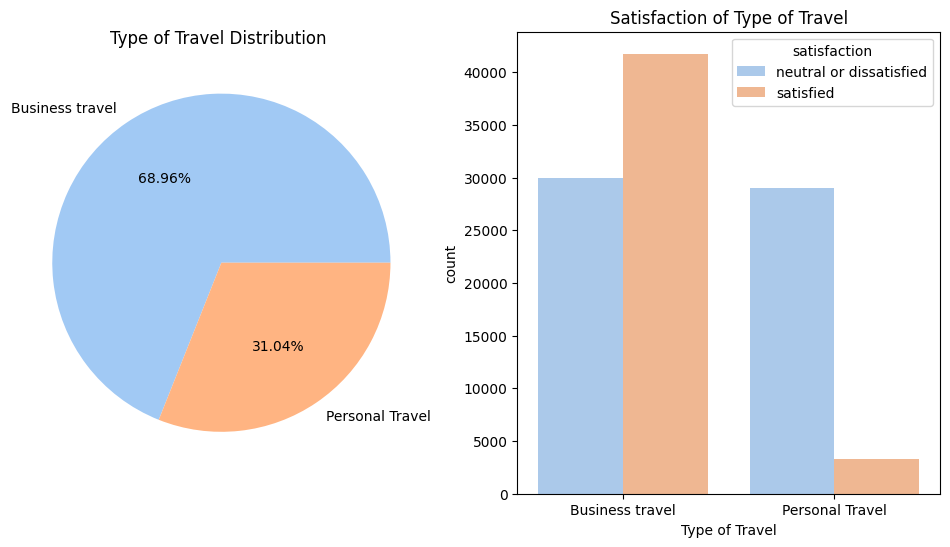

In [24]:
figure, axes = plt.subplots(1,2,figsize = (12,6))

# 绘制第一个图
type_of_travel_count = cleaned_train_data['Type of Travel'].value_counts()
type_of_travel_label = type_of_travel_count.index
axes[0].pie(type_of_travel_count, labels = type_of_travel_label, autopct = '%.2f%%')
axes[0].set_title('Type of Travel Distribution ')

# 绘制第二个图
sns.countplot(cleaned_train_data, x = 'Type of Travel', hue = 'satisfaction',ax = axes[1])
axes[1].set_title('Satisfaction of Type of Travel')

plt.show()

从上图可以发现，商业旅行的人数比个人旅行的多，且商业旅行的满意度比较好。而个人旅行的满意度大部分为中立或不满意

### 乘客乘坐飞机的旅行舱与满意度

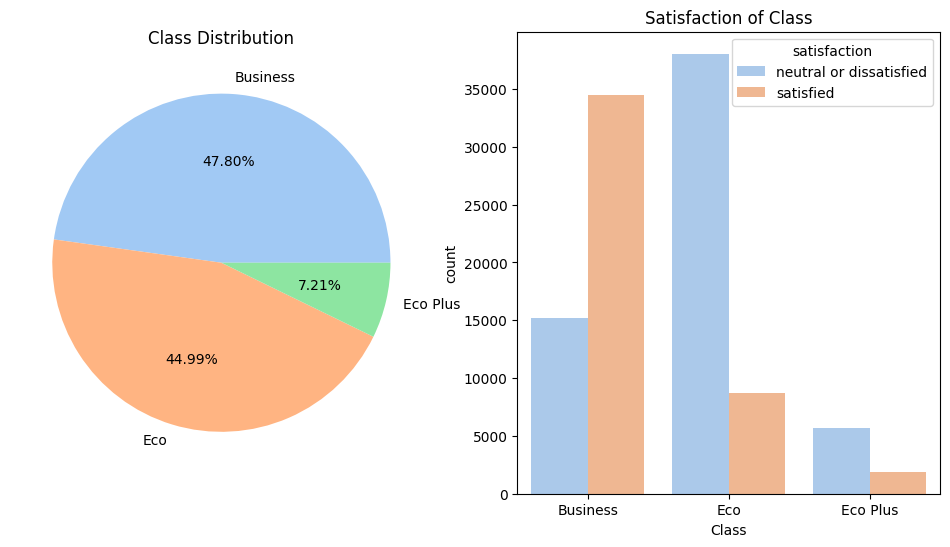

In [25]:
figure,axes = plt.subplots(1,2,figsize = (12,6))

# 绘制第一个图
class_count = cleaned_train_data['Class'].value_counts()
class_label = class_count.index
axes[0].pie(class_count, labels = class_label, autopct = '%.2f%%')
axes[0].set_title('Class Distribution')

# 绘制第二个图
sns.countplot(cleaned_train_data, x = 'Class', hue = 'satisfaction', ax = axes[1])
axes[1].set_title('Satisfaction of Class')

plt.show()

从图可以得知，大部分人都选择经济舱和商务舱，少量人选择舒适经济舱。在满意度方面，商务舱的满意度比较高，而经济舱的满意度都不太理想

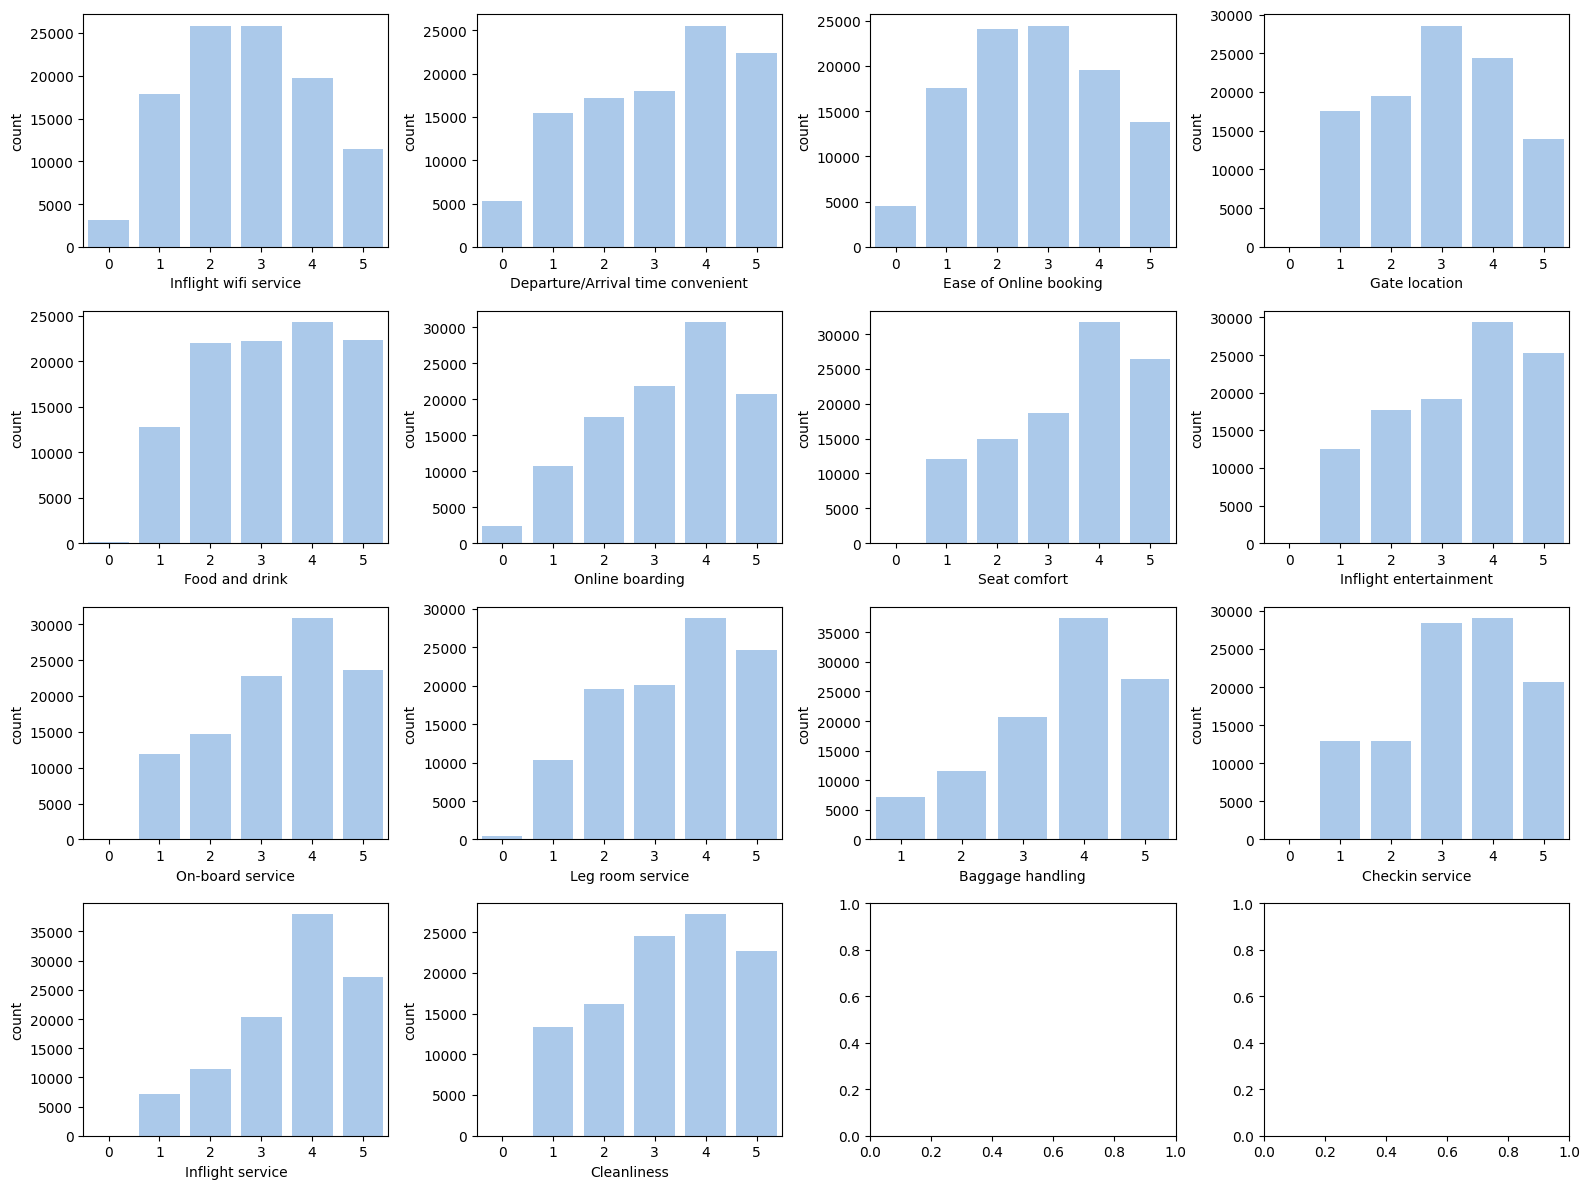

In [26]:
import math

s_counts = satisfaction_columns.shape[1]
plot_x = math.ceil(s_counts/4)
plot_y = math.ceil(s_counts/4)
figure,axes = plt.subplots(plot_x,plot_y,figsize = (16,12))
x = 0
y = 0

for i,column in enumerate(satisfaction_columns.columns):
    x = i // plot_x
    y = i % plot_y
    sns.countplot(satisfaction_columns,x = column,ax = axes[x,y])

plt.tight_layout()
plt.show()

以上我们发现：从Inflight wifi service，Departure/Arrival time convenient，Ease of Online booking

Gate location，Food and drink，Satisfaction level of online boarding，Seat comfort，Inflight entertainment，On-board service，Leg room service，

Baggage handling，Check-in ser到ice，Cleanli的满意度数量统计,可以看到大部分都处在2-4之间。ness

## 分析数据

接下来我们将利用清理后得到的数据进行逻辑回归分析，得到在不同情况下顾客对航空公司的满意度

In [27]:
import statsmodels.api as sm

引入模块后，先建立一个新的DataFrame，让它作为我们逻辑分析的数据。原因是我们可能会对数据进行准备，比如引入虚拟变量。

In [28]:
lr_airline_survey_train = cleaned_train_data.copy()

In [29]:
lr_airline_survey_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied


先移除不会影响满意度的变量

In [30]:
lr_airline_survey_train = lr_airline_survey_train.drop(['Unnamed: 0','id'],axis = 1)
lr_airline_survey_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3.0,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0.0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7.0,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0.0,0.0,neutral or dissatisfied


In [31]:
lr_airline_survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

引入虚拟变量

In [32]:
lr_airline_survey_train = pd.get_dummies(lr_airline_survey_train, 
                                         drop_first = True, 
                                         columns = ['Gender','Customer Type','Type of Travel','Class','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','satisfaction'],dtype = int)
lr_airline_survey_train.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service_1,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,satisfaction_satisfied
0,13,460,25.0,18.0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,25,235,1.0,6.0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,26,1142,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,25,562,11.0,9.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,61,214,0.0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


接下来划分自变量和因变量

In [33]:
y = lr_airline_survey_train['satisfaction_satisfied']

In [34]:
x = lr_airline_survey_train.drop('satisfaction_satisfied',axis = 1)
x.corr()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service_1,...,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
Age,1.000000,0.099461,-0.010152,-0.012127,0.008928,-0.281674,-0.048524,-0.132551,-0.013376,0.010068,...,0.043825,0.065938,-0.034276,-0.043539,0.006449,-0.040084,-0.071182,0.054918,0.033023,0.003508
Flight Distance,0.099461,1.000000,0.002158,-0.002423,0.005828,-0.225200,-0.267344,-0.404493,-0.123674,0.026702,...,-0.030073,-0.010676,-0.043257,0.014402,0.048104,-0.065845,-0.073729,0.027160,0.052151,0.034538
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.961161,0.002935,0.004036,-0.005432,0.008158,0.004492,0.011350,...,0.030377,0.016376,0.039454,-0.026590,-0.035555,0.008609,0.013251,-0.005848,-0.005943,-0.006325
Arrival Delay in Minutes,-0.012127,-0.002423,0.961161,1.000000,0.000395,0.004741,-0.005674,0.011512,0.006543,0.012067,...,0.032032,0.017569,0.043312,-0.028254,-0.039013,0.009973,0.014723,-0.006774,-0.007028,-0.006619
Gender_Male,0.008928,0.005828,0.002935,0.000395,1.000000,-0.031732,0.006909,-0.005295,-0.010351,-0.001834,...,-0.030486,-0.029627,0.000627,0.024490,0.011233,-0.005624,0.010595,-0.013351,-0.002706,0.011870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cleanliness_1,-0.040084,-0.065845,0.008609,0.009973,-0.005624,0.069077,0.061636,0.084344,0.019860,0.095761,...,0.013136,0.019991,0.039441,-0.011340,-0.044948,1.000000,-0.164382,-0.213407,-0.228211,-0.202665
Cleanliness_2,-0.071182,-0.073729,0.013251,0.014723,0.010595,0.064446,0.055320,0.100612,0.027582,-0.030500,...,0.008240,0.016732,0.054856,-0.010117,-0.055067,-0.164382,1.000000,-0.238608,-0.255161,-0.226598
Cleanliness_3,0.054918,0.027160,-0.005848,-0.006774,-0.013351,-0.032832,-0.017286,-0.038857,-0.007563,-0.013770,...,-0.011269,0.001616,0.003379,0.007373,-0.005885,-0.213407,-0.238608,1.000000,-0.331259,-0.294177
Cleanliness_4,0.033023,0.052151,-0.005943,-0.007028,-0.002706,-0.055710,-0.053469,-0.062879,-0.017037,-0.022911,...,0.009555,0.001615,-0.027051,-0.005302,0.023588,-0.228211,-0.255161,-0.331259,1.000000,-0.314585


如果相关系数的绝对值大于0.8，将会导致严重的共线性，应该找出大于0.8的数值

In [35]:
x.corr().abs() > 0.8

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service_1,...,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
Age,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Flight Distance,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Departure Delay in Minutes,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Arrival Delay in Minutes,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gender_Male,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cleanliness_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
Cleanliness_2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Cleanliness_3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
Cleanliness_4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


因为展示不全，只发现Departure Delay in Minutes和Arrival Delay in Minutes列中相关性较高，应该移除以免导致无法收敛。

我们可以用热力图直观观察所有列

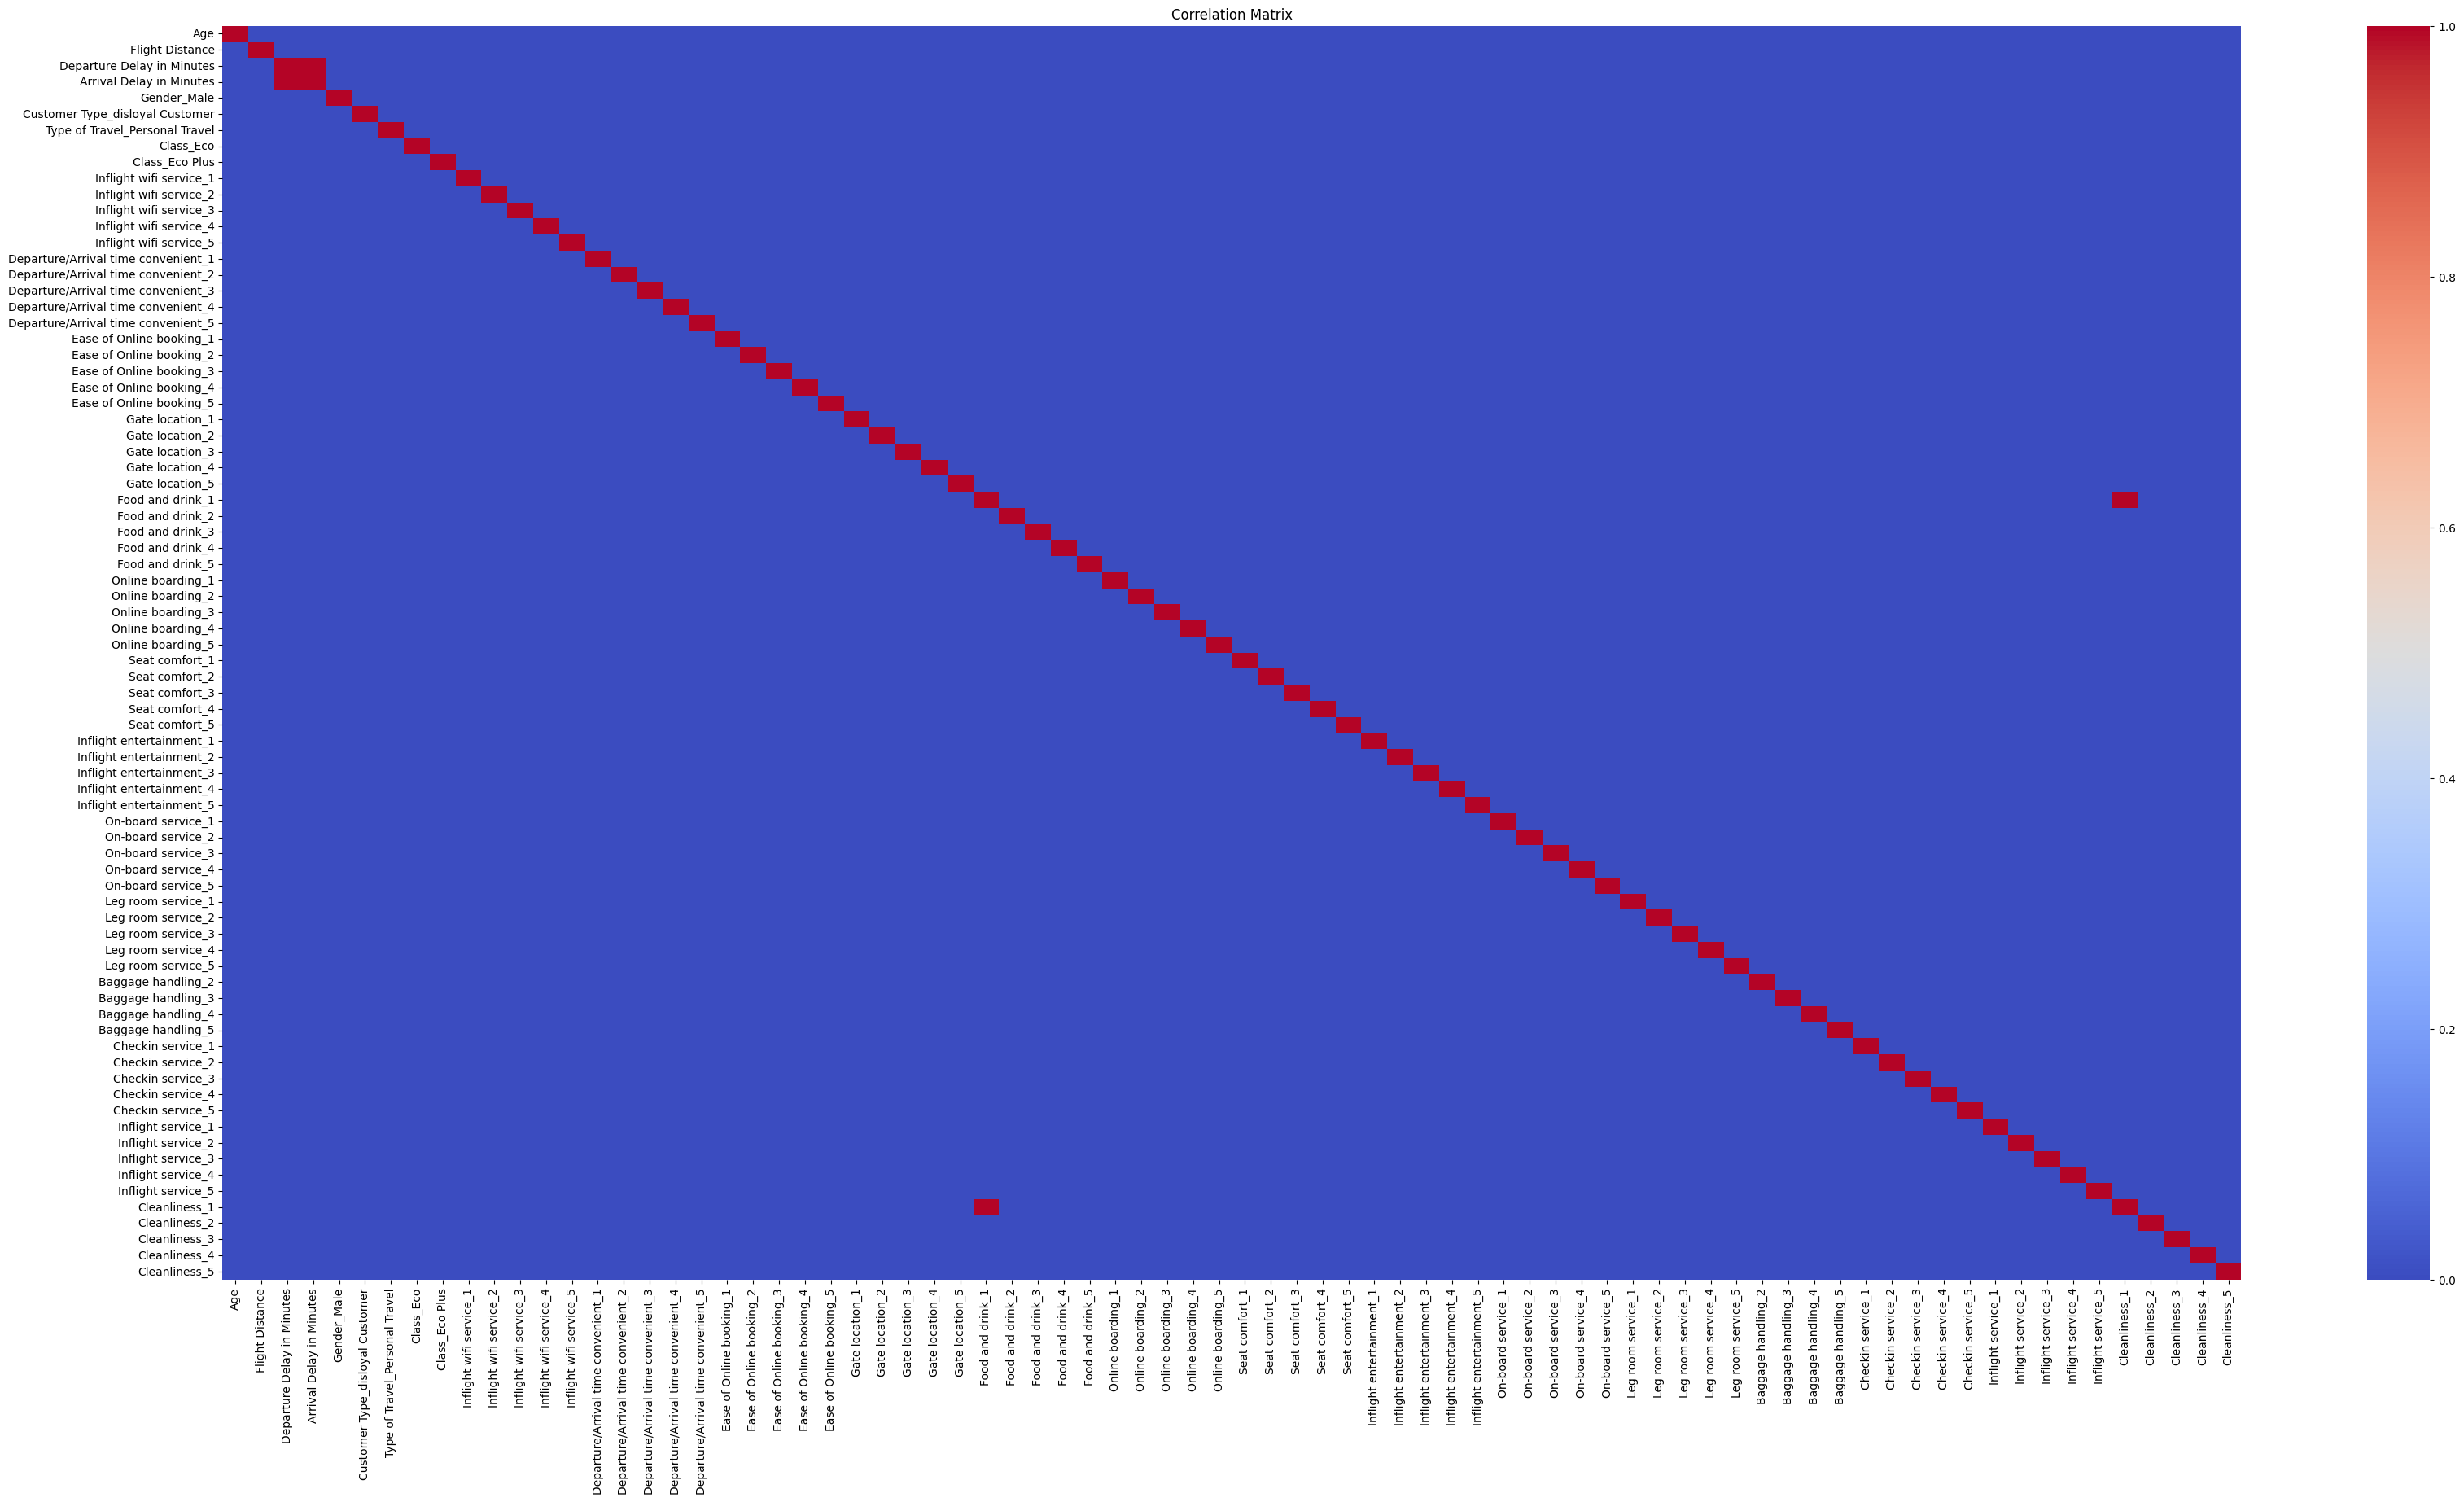

In [36]:
# 计算相关系数矩阵
correlation_matrix = x.corr().abs() > 0.7

# 绘制热力图
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

发现Departure Delay in Minutes和Arrival Delay in Minutes列中相关性较高，

而为了保证收敛，设置成0.7相关系数阈值，发现Food and drink_1大于0.7,应该移除以免导致无法收敛

In [37]:
x = x.drop(['Departure Delay in Minutes','Arrival Delay in Minutes','Food and drink_1'],axis = 1)

接下来给线性方程增加截距

In [38]:
x = sm.add_constant(x)

调用logit函数，利用最大似然优化得到逻辑回归模型参数值，并输出总结信息

In [39]:
model = sm.Logit(y,x).fit()
model.summary()

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     satisfaction_satisfied   No. Observations:               103904
Model:                              Logit   Df Residuals:                   103829
Method:                               MLE   Df Model:                           74
Date:                    Wed, 14 Feb 2024   Pseudo R-squ.:                    -inf
Time:                            14:33:19   Log-Likelihood:                   -inf
converged:                          False   LL-Null:                       -71094.
Covariance Type:                nonrobust   LLR p-value:                     1.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                6.774e+06        nan        nan        nan         nan         nan
Age                                    -0.0018      0.001     -1.823      0.068      -0.004       0.000
Flight Distance                      7.211e-06   1.53e-05      0.471      0.638   -2.28e-05    3.72e-05
Gender_Male                             0.0433      0.027      1.589      0.112      -0.010       0.097
Customer Type_disloyal Customer        -3.3435      0.050    -67.528      0.000      -3.441      -3.246
Type of Travel_Personal Travel         -4.2565      0.055    -77.381      0.000      -4.364      -4.149
Class_Eco                              -0.6357      0.037    -17.095      0.000      -0.709      -0.563
Class_Eco Plus                         -0.8604      0.060    -14.223      0.000      -0.979      -0.742
Inflight wifi service_1             -2.052e+06        nan        nan        nan         nan         nan
Inflight wifi service_2             -2.052e+06        nan        nan        nan         nan         nan
Inflight wifi service_3             -2.052e+06        nan        nan        nan         nan         nan
Inflight wifi service_4             -2.052e+06        nan        nan        nan         nan         nan
Inflight wifi service_5             -2.052e+06        nan        nan        nan         nan         nan
Departure/Arrival time convenient_1     0.2939      0.093      3.163      0.002       0.112       0.476
Departure/Arrival time convenient_2     0.4082      0.089      4.564      0.000       0.233       0.584
Departure/Arrival time convenient_3     0.2259      0.086      2.619      0.009       0.057       0.395
Departure/Arrival time convenient_4    -0.7007      0.077     -9.072      0.000      -0.852      -0.549
Departure/Arrival time convenient_5    -0.9428      0.085    -11.113      0.000      -1.109      -0.777
Ease of Online booking_1                5.5462      0.886      6.260      0.000       3.810       7.283
Ease of Online booking_2                5.4703      0.886      6.178      0.000       3.735       7.206
Ease of Online booking_3                5.9688      0.885      6.742      0.000       4.234       7.704
Ease of Online booking_4                6.8285      0.885      7.714      0.000       5.094       8.564
Ease of Online booking_5                6.1931      0.884      7.007      0.000       4.461       7.925
Gate location_1                      1.778e+06        nan        nan        nan         nan         nan
Gate location_2                      1.778e+06        nan        nan        nan         nan         nan
Gate location_3                      1.778e+06        nan        nan        nan         nan         nan
Gate location_4                      1.778e+06        nan        nan        nan         nan         nan
Gate location_5                      1.778e+06        nan        nan        nan      

我们设定显著区间为0.05，从以上结果可以看出存在大于0.05的p值，表明该列对满意度没有显著性影响，先移除再进行模型建立

In [40]:
x = x.drop(['Age','Flight Distance','Gender_Male','Food and drink_5','Inflight service_1',
            'Inflight service_2','Inflight service_3','Inflight service_4','Inflight service_5'],axis = 1)
model = sm.Logit(y,x).fit()
model.summary()

         Current function value: 0.182082
         Iterations: 35


C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     satisfaction_satisfied   No. Observations:               103904
Model:                              Logit   Df Residuals:                   103837
Method:                               MLE   Df Model:                           66
Date:                    Wed, 14 Feb 2024   Pseudo R-squ.:                  0.7339
Time:                            14:33:21   Log-Likelihood:                -18919.
converged:                          False   LL-Null:                       -71094.
Covariance Type:                nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  45.6811   6.43e+05    7.1e-05      1.000   -1.26e+06    1.26e+06
Customer Type_disloyal Customer        -3.1782      0.046    -68.724      0.000      -3.269      -3.088
Type of Travel_Personal Travel         -4.1101      0.053    -77.243      0.000      -4.214      -4.006
Class_Eco                              -0.7042      0.035    -20.315      0.000      -0.772      -0.636
Class_Eco Plus                         -0.9158      0.058    -15.790      0.000      -1.029      -0.802
Inflight wifi service_1               -22.2996     65.977     -0.338      0.735    -151.613     107.014
Inflight wifi service_2               -22.5737     65.977     -0.342      0.732    -151.887     106.740
Inflight wifi service_3               -22.6288     65.977     -0.343      0.732    -151.942     106.685
Inflight wifi service_4               -21.0607     65.977     -0.319      0.750    -150.374     108.253
Inflight wifi service_5               -15.5662     65.978     -0.236      0.813    -144.880     113.747
Departure/Arrival time convenient_1     0.2336      0.092      2.546      0.011       0.054       0.413
Departure/Arrival time convenient_2     0.3459      0.089      3.908      0.000       0.172       0.519
Departure/Arrival time convenient_3     0.2023      0.086      2.365      0.018       0.035       0.370
Departure/Arrival time convenient_4    -0.6816      0.077     -8.905      0.000      -0.832      -0.532
Departure/Arrival time convenient_5    -0.9051      0.084    -10.736      0.000      -1.070      -0.740
Ease of Online booking_1                3.0637      0.752      4.073      0.000       1.590       4.538
Ease of Online booking_2                3.0010      0.752      3.990      0.000       1.527       4.475
Ease of Online booking_3                3.5015      0.752      4.657      0.000       2.028       4.975
Ease of Online booking_4                4.3293      0.752      5.761      0.000       2.856       5.802
Ease of Online booking_5                3.6789      0.752      4.893      0.000       2.205       5.152
Gate location_1                       -48.7895   6.45e+05  -7.56e-05      1.000   -1.26e+06    1.26e+06
Gate location_2                       -48.6999   6.45e+05  -7.55e-05      1.000   -1.26e+06    1.26e+06
Gate location_3                       -48.9211   6.45e+05  -7.59e-05      1.000   -1.26e+06    1.26e+06
Gate location_4                       -49.1954   6.45e+05  -7.63e-05      1.000   -1.26e+06    1.26e+06
Gate location_5                       -49.3716   6.45e+05  -7.66e-05      1.000   -1.26e+06    1.26e+06
Food and drink_2                        0.2689      0.050      5.326      0.000       0.170       0.368
Food and drink_3                        0.2524      0.049      5.104      0.000       0.155       0.349
Food and drink_4                        0.1940      0.048      4.012      0.000      

模型未收敛，存在大量模型认为没有显著性影响的参数。再次进行删除p大于0.05的列进行建立模型

In [41]:
x = x.drop(['const','Inflight wifi service_1','Inflight wifi service_2','Inflight wifi service_3','Inflight wifi service_4',
            'Inflight wifi service_5','Gate location_1','Gate location_2','Gate location_3','Gate location_4','Gate location_5',
            'Online boarding_5','Inflight entertainment_1','Inflight entertainment_2','Inflight entertainment_3','Inflight entertainment_4',
            'Inflight entertainment_5','On-board service_1','On-board service_2','On-board service_3','On-board service_4','On-board service_5',
            'Leg room service_4','Leg room service_5','Checkin service_1','Checkin service_2','Checkin service_3','Checkin service_4',
            'Checkin service_5','Cleanliness_1','Cleanliness_2','Cleanliness_3','Cleanliness_4','Cleanliness_5'],axis = 1)
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.267546
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     satisfaction_satisfied   No. Observations:               103904
Model:                              Logit   Df Residuals:                   103871
Method:                               MLE   Df Model:                           32
Date:                    Wed, 14 Feb 2024   Pseudo R-squ.:                  0.6090
Time:                            14:33:22   Log-Likelihood:                -27799.
converged:                           True   LL-Null:                       -71094.
Covariance Type:                nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Customer Type_disloyal Customer        -2.3623      0.033    -70.602      0.000      -2.428      -2.297
Type of Travel_Personal Travel         -3.3753      0.037    -90.876      0.000      -3.448      -3.303
Class_Eco                              -0.7020      0.026    -26.808      0.000      -0.753      -0.651
Class_Eco Plus                         -0.8650      0.043    -19.914      0.000      -0.950      -0.780
Departure/Arrival time convenient_1     0.0108      0.065      0.165      0.869      -0.117       0.139
Departure/Arrival time convenient_2     0.1945      0.063      3.087      0.002       0.071       0.318
Departure/Arrival time convenient_3     0.0777      0.061      1.267      0.205      -0.042       0.198
Departure/Arrival time convenient_4    -0.6204      0.055    -11.226      0.000      -0.729      -0.512
Departure/Arrival time convenient_5    -0.8572      0.058    -14.824      0.000      -0.970      -0.744
Ease of Online booking_1               -1.1911      0.064    -18.521      0.000      -1.317      -1.065
Ease of Online booking_2               -1.5202      0.061    -25.103      0.000      -1.639      -1.401
Ease of Online booking_3               -1.3005      0.059    -22.148      0.000      -1.416      -1.185
Ease of Online booking_4               -0.1772      0.054     -3.276      0.001      -0.283      -0.071
Ease of Online booking_5                0.3594      0.054      6.666      0.000       0.254       0.465
Food and drink_2                        0.0975      0.035      2.761      0.006       0.028       0.167
Food and drink_3                        0.4407      0.034     12.782      0.000       0.373       0.508
Food and drink_4                        0.4772      0.033     14.449      0.000       0.413       0.542
Online boarding_1                      -3.6088      0.052    -69.086      0.000      -3.711      -3.506
Online boarding_2                      -3.6859      0.048    -77.109      0.000      -3.780      -3.592
Online boarding_3                      -3.6389      0.043    -84.672      0.000      -3.723      -3.555
Online boarding_4                      -1.6471      0.037    -44.092      0.000      -1.720      -1.574
Seat comfort_1                          4.4063      0.083     53.345      0.000       4.244       4.568
Seat comfort_2                          4.3078      0.085     50.942      0.000       4.142       4.474
Seat comfort_3                          3.5881      0.081     44.494      0.000       3.430       3.746
Seat comfort_4                          4.3255      0.079     54.924      0.000       4.171       4.480
Seat comfort_5                          5.1753      0.079     65.346      0.000       5.020       5.331
Leg room service_1                     -1.4095      0.041    -34.656      0.000      -1.489      -1.330
Leg room service_2                     -1.0211      0.031    -33.234      0.000      

In [42]:
x = x.drop(['Departure/Arrival time convenient_1','Departure/Arrival time convenient_3'],axis = 1)
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.267557
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     satisfaction_satisfied   No. Observations:               103904
Model:                              Logit   Df Residuals:                   103873
Method:                               MLE   Df Model:                           30
Date:                    Wed, 14 Feb 2024   Pseudo R-squ.:                  0.6090
Time:                            14:33:23   Log-Likelihood:                -27800.
converged:                           True   LL-Null:                       -71094.
Covariance Type:                nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Customer Type_disloyal Customer        -2.3676      0.033    -72.559      0.000      -2.432      -2.304
Type of Travel_Personal Travel         -3.3745      0.037    -90.883      0.000      -3.447      -3.302
Class_Eco                              -0.7025      0.026    -26.830      0.000      -0.754      -0.651
Class_Eco Plus                         -0.8654      0.043    -19.925      0.000      -0.950      -0.780
Departure/Arrival time convenient_2     0.1555      0.044      3.534      0.000       0.069       0.242
Departure/Arrival time convenient_4    -0.6578      0.035    -18.899      0.000      -0.726      -0.590
Departure/Arrival time convenient_5    -0.8952      0.038    -23.790      0.000      -0.969      -0.821
Ease of Online booking_1               -1.2036      0.056    -21.437      0.000      -1.314      -1.094
Ease of Online booking_2               -1.5107      0.060    -25.382      0.000      -1.627      -1.394
Ease of Online booking_3               -1.2661      0.054    -23.591      0.000      -1.371      -1.161
Ease of Online booking_4               -0.1691      0.053     -3.173      0.002      -0.273      -0.065
Ease of Online booking_5                0.3674      0.053      6.926      0.000       0.263       0.471
Food and drink_2                        0.0972      0.035      2.752      0.006       0.028       0.166
Food and drink_3                        0.4397      0.034     12.758      0.000       0.372       0.507
Food and drink_4                        0.4775      0.033     14.458      0.000       0.413       0.542
Online boarding_1                      -3.6071      0.052    -69.111      0.000      -3.709      -3.505
Online boarding_2                      -3.6854      0.048    -77.099      0.000      -3.779      -3.592
Online boarding_3                      -3.6397      0.043    -84.722      0.000      -3.724      -3.555
Online boarding_4                      -1.6475      0.037    -44.106      0.000      -1.721      -1.574
Seat comfort_1                          4.4359      0.075     59.475      0.000       4.290       4.582
Seat comfort_2                          4.3377      0.077     56.531      0.000       4.187       4.488
Seat comfort_3                          3.6187      0.072     50.041      0.000       3.477       3.760
Seat comfort_4                          4.3549      0.071     61.654      0.000       4.216       4.493
Seat comfort_5                          5.2040      0.072     72.765      0.000       5.064       5.344
Leg room service_1                     -1.4081      0.041    -34.661      0.000      -1.488      -1.328
Leg room service_2                     -1.0209      0.031    -33.234      0.000      -1.081      -0.961
Leg room service_3                     -1.0163      0.030    -34.343      0.000      -1.074      -0.958
Baggage handling_2                     -0.2423      0.050     -4.827      0.000      

从筛选出来p值小于0.05的列可以得知，只有这些列对满意度概率存在显著性影响

#### 对coef进行指数化分析

In [128]:
# 读取结论的表格
model_table = model.summary().tables

# 将第二个表转化成DataFrame
model_df = pd.DataFrame(model_table[1])

# 将第一行作为列标签并且删除第一行，因为作为标签后不会删除
model_df.columns = model_df.iloc[0]
model_df = model_df.drop(0)

# 重命名第一列参数为item，并且重置索引，删掉重置前的索引
model_df = model_df.rename(columns = {model_df.columns[0]:'item'})
model_df.reset_index(drop = True,inplace = True)
model_df

,item,coef,std err,z,P>|z|,[0.025,0.975]
0,Customer Type_disloyal Customer,-2.3676,0.033,-72.559,0.000,-2.432,-2.304
1,Type of Travel_Personal Travel,-3.3745,0.037,-90.883,0.000,-3.447,-3.302
2,Class_Eco,-0.7025,0.026,-26.830,0.000,-0.754,-0.651
3,Class_Eco Plus,-0.8654,0.043,-19.925,0.000,-0.950,-0.780
4,Departure/Arrival time convenient_2,0.1555,0.044,3.534,0.000,0.069,0.242
5,Departure/Arrival time convenient_4,-0.6578,0.035,-18.899,0.000,-0.726,-0.590
6,Departure/Arrival time convenient_5,-0.8952,0.038,-23.790,0.000,-0.969,-0.821
7,Ease of Online booking_1,-1.2036,0.056,-21.437,0.000,-1.314,-1.094
8,Ease of Online booking_2,-1.5107,0.060,-25.382,0.000,-1.627,-1.394
9,Ease of Online booking_3,-1.2661,0.054,-23.591,0.000,-1.371,-1.161


获取到表格数据，对coef进行分析

In [136]:
model_df = model_df.astype(str)
model_df['coef'] = model_df['coef'].astype(float)

In [ ]:
model_df = model_df.drop('')

In [137]:
model_df['coef_exp'] = np.exp(model_df['coef'])
model_df

,item,coef,std err,z,P>|z|,[0.025,0.975],coef_exp
0,Customer Type_disloyal Customer,-2.3676,0.033,-72.559,0.000,-2.432,-2.304,0.093705
1,Type of Travel_Personal Travel,-3.3745,0.037,-90.883,0.000,-3.447,-3.302,0.034235
2,Class_Eco,-0.7025,0.026,-26.830,0.000,-0.754,-0.651,0.495345
3,Class_Eco Plus,-0.8654,0.043,-19.925,0.000,-0.950,-0.780,0.420883
4,Departure/Arrival time convenient_2,0.1555,0.044,3.534,0.000,0.069,0.242,1.168242
5,Departure/Arrival time convenient_4,-0.6578,0.035,-18.899,0.000,-0.726,-0.590,0.517990
6,Departure/Arrival time convenient_5,-0.8952,0.038,-23.790,0.000,-0.969,-0.821,0.408526
7,Ease of Online booking_1,-1.2036,0.056,-21.437,0.000,-1.314,-1.094,0.300112
8,Ease of Online booking_2,-1.5107,0.060,-25.382,0.000,-1.627,-1.394,0.220755
9,Ease of Online booking_3,-1.2661,0.054,-23.591,0.000,-1.371,-1.161,0.281929


In [43]:
# Customer Type_disloyal Customer
np.exp(-2.3676)

0.09370534946112638

以上结果说明，非忠诚顾客满意的概率比忠诚顾客的概率低了90%左右

In [44]:
# Type of Travel_Personal Travel
np.exp(-3.3745)

0.03423523164879963

以上结果说明，选择个人旅行满意的概率比选择商务旅行满意的概率低97%左右

In [45]:
# Class_Eco
np.exp(-0.7025)

0.4953453910686223

以上结果说明，选择经济舱满意的概率比商务舱满意的概率低了51%左右

In [110]:
# Class_Eco Plus
np.exp(-0.8654)

0.4208831656859037

以上结果说明，选择舒适经济舱满意的概率比经济舱满意的概率低了46%左右

In [111]:
# Departure/Arrival time convenient_2
np.exp(0.1555)

1.168241936067252

以上结果说明，在离港/抵达时间方便的满意度中，选择了满意度为2的选项在对航空公司的满意度为满意的概率是选了满意度为1的0.16倍

以此类推。。。

我们总体上发现，Seat comfort即沙发舒适度的coef_exp数值很大，说明沙发舒适度对顾客是否满意航空公司来说很重要，每提升一个沙发舒适度满意度，顾客满意的概率大幅提升